# jacscanomaly – Minimal Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import sys
import logging
logging.basicConfig(level=logging.INFO)
logging.getLogger("jax").setLevel(logging.WARNING)

from jacscanomaly import Finder, FinderConfig

In [2]:
data = np.load("example_data.npy")

time, flux, ferr = data[:, 0], data[:, 1], data[:, 2]

In [3]:
# Initial guess for PSPL parameters
t0_init = 9.82656e3
tE_init = 8.61
u0_init = 0.353

p0 = np.array([t0_init, tE_init, u0_init])


In [4]:
config = FinderConfig()
finder = Finder(config)

result = finder.run(time, flux, ferr, p0)


INFO:jacscanomaly.runner:Season split: 6 season(s) (gap=100.000)
INFO:jacscanomaly.runner:teff grid: n=20, teff_init=0.03, ratio=1.33333
INFO:jacscanomaly.runner:[1/6] Season 0: start=8346.501847 end=8418.491823 n_pts=6756
INFO:jacscanomaly.runner:  -> grid: n_grid=56295
INFO:jacscanomaly.runner:  -> extracted clusters: 209 | grid=2.839s copy=0.001s extract=0.167s | season total=3.087s
INFO:jacscanomaly.runner:[2/6] Season 1: start=8526.256838 end=8598.246814 n_pts=6756
INFO:jacscanomaly.runner:  -> grid: n_grid=56295
INFO:jacscanomaly.runner:  -> extracted clusters: 210 | grid=2.977s copy=0.000s extract=0.047s | season total=3.030s
INFO:jacscanomaly.runner:[3/6] Season 2: start=8711.750975 end=8783.740951 n_pts=6757
INFO:jacscanomaly.runner:  -> grid: n_grid=56295
INFO:jacscanomaly.runner:  -> extracted clusters: 233 | grid=2.858s copy=0.000s extract=0.190s | season total=3.247s
INFO:jacscanomaly.runner:[4/6] Season 3: start=9622.004222 end=9693.994198 n_pts=6757
INFO:jacscanomaly.run

In [5]:
print("=== PSPL fit ===")

t0_pspl, tE_pspl, u0_pspl = result.fit.params
print(f"  t0          = {float(t0_pspl):.3f}")
print(f"  tE          = {float(tE_pspl):.3f}")
print(f"  u0          = {float(u0_pspl):.3f}")
print(f"  chi2 / dof  = {result.chi2_dof:.3f}\n")

b = result.best
print("=== Anomaly candidate ===")
print(f"  t0          = {b.t0:.3f}")
print(f"  teff        = {b.teff:.3f}")
print(f"  dchi2       = {b.dchi2:.3e}")
print(f"  score       = {b.score:.2f}")


=== PSPL fit ===
  t0          = 9826.561
  tE          = 8.616
  u0          = 0.353
  chi2 / dof  = 0.998

=== Anomaly candidate ===
  t0          = 9826.001
  teff        = 0.300
  dchi2       = 1.112e+02
  score       = 32.14


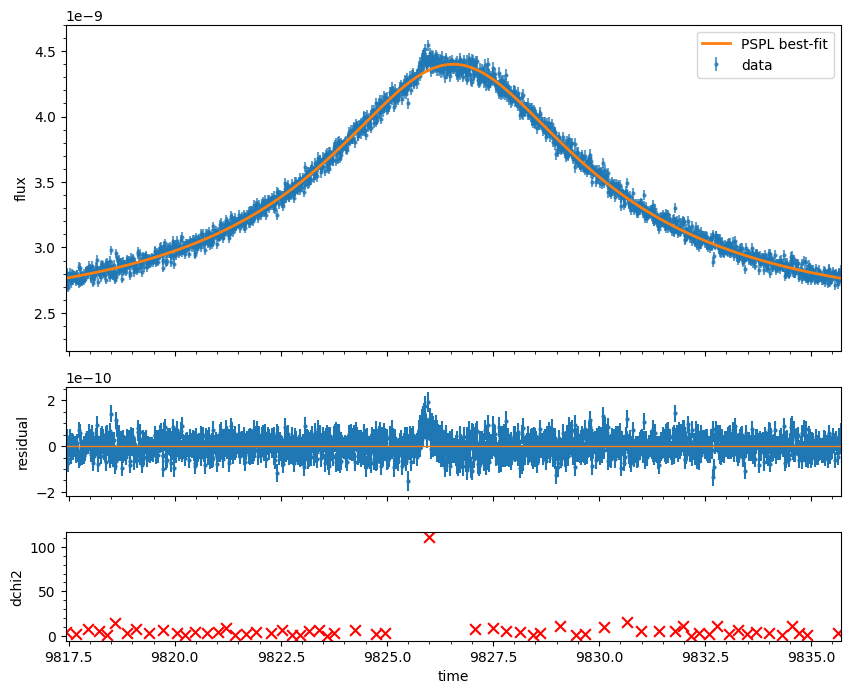

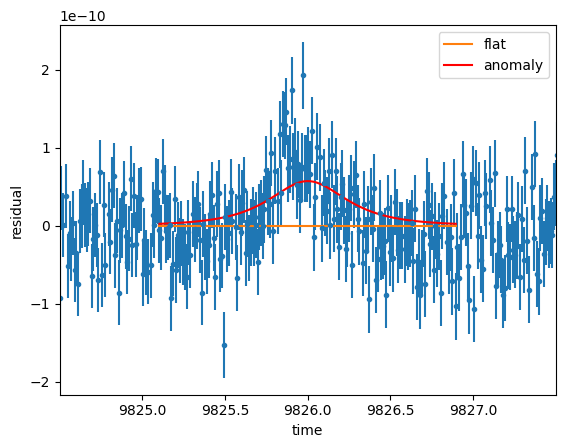

In [6]:
finder.plot_result()
plt.show()

finder.plot_anomaly_window()
plt.show()